## Evaluate the reconstructed ssGEMs rxn and gene size 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

# set working directory
os.chdir(r'D:\code\github/Unified_Yeast_GEMs_Database')

In [2]:
# load simulation result
df_ssGEM_simulation_result=pd.read_csv('result/model_simulation/df_ssGEMs_size.csv',index_col=0)
df_ssGEM_simulation_result

# load strain info
df_strain_info=pd.read_excel(r'data/1897_strains_info.xlsx',index_col=0)
# remove duplicate index in df_strain_info
df_strain_info=df_strain_info[~df_strain_info.index.duplicated(keep='first')]


In [3]:
df_ssGEM_simulation_result
# remove .xml in index
df_ssGEM_simulation_result.index = df_ssGEM_simulation_result.index.str.replace('.xml', '')
df_ssGEM_simulation_result

,gene_numb,rxn_numb,aerobic_growth,aerobic_rxns,anaerobic_growth,anaerobic_rxns,type
AAA_6.re,1121,4131,0.000000,273,0.000000,0,Wine
AAB_6.re,1122,4132,0.087944,628,0.024025,529,Beer
AAC_6.re,1103,4109,0.084674,529,0.023851,481,Beer
AAD_6.re,1112,4129,0.087944,468,0.024025,592,Sake
AAE_6.re,1122,4134,0.087944,566,0.024025,563,Wine
...,...,...,...,...,...,...,...
YDH.re,1121,4139,0.087944,535,0.024025,618,Fermentation
YDI.re,1119,4133,0.087944,533,0.024025,624,Unknown
YDJ.re,1115,4127,0.087944,533,0.024025,516,Wine
YDK.re,1113,4133,0.087944,632,0.024025,701,Industrial_other


In [4]:
# add type to df_ssGEM_simulation_result according to df_strain_info['sub_type']
df_ssGEM_simulation_result['type']=df_ssGEM_simulation_result.index.map(lambda x: df_strain_info.loc[x,'type_L3'] if x in df_strain_info.index else 'Unknown')
# change all 0 to unknown
df_ssGEM_simulation_result['type']=df_ssGEM_simulation_result['type'].map(lambda x: 'Unknown' if x==0 else x)
clades_strain_numb=df_ssGEM_simulation_result['type'].value_counts()
df_ssGEM_simulation_result.head()
# remove rows with nan value
df_ssGEM_simulation_result=df_ssGEM_simulation_result.dropna()

C:\Users\wangh\AppData\Local\Temp\ipykernel_18464\74803704.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2].set_xticklabels(axes[2].get_xticklabels(),rotation=45,ha='right')


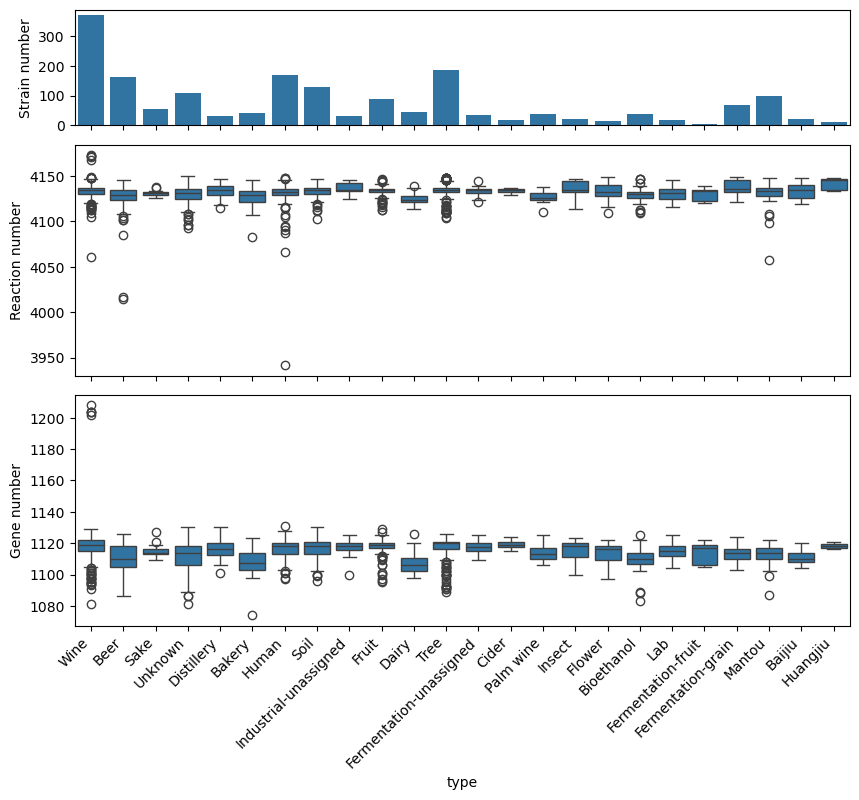

In [5]:
# plot 3 bar plot to show clade size, rxn size and gene size of ssGEMs, and the first subplot height is 3 times of the other two subplots
fig,axes=plt.subplots(3,1,figsize=(10,8),sharex=True,gridspec_kw={'height_ratios':[1,2,2]})
# set space between subplots
plt.subplots_adjust(hspace=0.1)

# box plot for ssGEMs gene number
sns.boxplot(data=df_ssGEM_simulation_result,y='gene_numb',x='type',ax=axes[2])
# set y axis label
axes[2].set_ylabel('Gene number')


# box plot for ssGEMs rxn number
sns.boxplot(data=df_ssGEM_simulation_result,y='rxn_numb',x='type',ax=axes[1])
# set y axis label
axes[1].set_ylabel('Reaction number')
# don't show x axis label and ticklabels
axes[1].set_xlabel('')
# axes[1].set_xticklabels('')

# extract xticklabels
xticklabels=axes[2].get_xticklabels()
clades_list=[i.get_text() for i in xticklabels]



# bar plot for ssGEMs clade number
sns.barplot(x=clades_list,y=clades_strain_numb[clades_list],ax=axes[0])
# set y axis label
axes[0].set_ylabel('Strain number')

# rotate xticklabels
axes[2].set_xticklabels(axes[2].get_xticklabels(),rotation=45,ha='right')

# # count how many ssGEMs in each type
ssGEM_type_count=df_ssGEM_simulation_result.groupby('type').count()['gene_numb'].values

# ax.set_ylabel('Gene number')
# ax.set_xlabel('ssGEM type')
# ax.set_title('ssGEM size evaluation')
plt.show()

In [6]:
# save result
df_ssGEM_simulation_result.to_csv('result/model_simulation/df_ssGEMs_size.csv', index=True)